In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import qcodes as qc
from qcodes import ParamSpec, new_data_set, new_experiment

# Experiment container and datasets

Once qcodes is imported we check if the database exists. If not, we create one and make sure the schema matches.

In [2]:
qc.config.core.db_location

'C:\\Users\\wihpniel\\src\\Qcodes\\docs\\examples\\DataSet/db_files/mvmhqlmnfs.db'

One .db file contains MANY experiments and MANY datasets.

## Experiments

We start wihtout experiments if the .db file is empty. A data set can't exist without an experiment!

In [3]:
dataSet = new_data_set("sweep gate")

We may decide that if there are no experiments, we create a default one.

But for now, let's create an experiment.

In [5]:
exp = new_experiment("majorana-qbuit", sample_name="flying bridge")
exp

majorana-qbuit#flying bridge#12@C:\Users\wihpniel\src\Qcodes\docs\examples\DataSet/db_files/mvmhqlmnfs.db
---------------------------------------------------------------------------------------------------------

Now we can create a dataset. Note two things:

    - if we don't specfiy a exp_id, but we have an experiment in the experiment container the dataset will go into that one.
    - dataset can be created from the experiment object
    

In [6]:
dataSet = new_data_set("sweep gate")
exp

majorana-qbuit#flying bridge#12@C:\Users\wihpniel\src\Qcodes\docs\examples\DataSet/db_files/mvmhqlmnfs.db
---------------------------------------------------------------------------------------------------------
105-sweep gate-1--0

In [7]:
data_set = exp.new_data_set("sweep gate")

These datasets are grim wihtout parameters.

In [10]:
parameter_a = ParamSpec("a", "numeric")
# metadata with key="value", and number=1
parameter_b = ParamSpec("b", "numeric", key="value", number=1)
# cann add new parameter: an array
parameter_c = ParamSpec("c", "array")

In [12]:
dataSet.add_parameter(parameter_a)
dataSet.add_parameter(parameter_b)
dataSet.add_parameter(parameter_c)
dataSet.mark_started()

In [13]:
dataSet

sweep gate #105@C:\Users\wihpniel\src\Qcodes\docs\examples\DataSet/db_files/mvmhqlmnfs.db
-----------------------------------------------------------------------------------------
a - numeric
b - numeric
c - array

In [14]:
dataSet.add_result({"a":1})

1

In [15]:
dataSet.get_data("a")

[[1]]

In [16]:
exp

majorana-qbuit#flying bridge#12@C:\Users\wihpniel\src\Qcodes\docs\examples\DataSet/db_files/mvmhqlmnfs.db
---------------------------------------------------------------------------------------------------------
105-sweep gate-1-a,b,c-1
106-sweep gate-2--0

## x-y loop example

In [18]:
dataSet = new_data_set("test",
                       specs=[ParamSpec("x", "numeric"), ParamSpec("y", "numeric")],
                       metadata={"so":"meta"})
dataSet.mark_started()

In [19]:
dataSet.exp_id

12

In [20]:
dataSet.add_metadata("more", "meta")

In [21]:
for x in range(100):
    y = 3*x + 10
    dataSet.add_result({"x":x, "y":y})

<IPython.core.display.Javascript object>


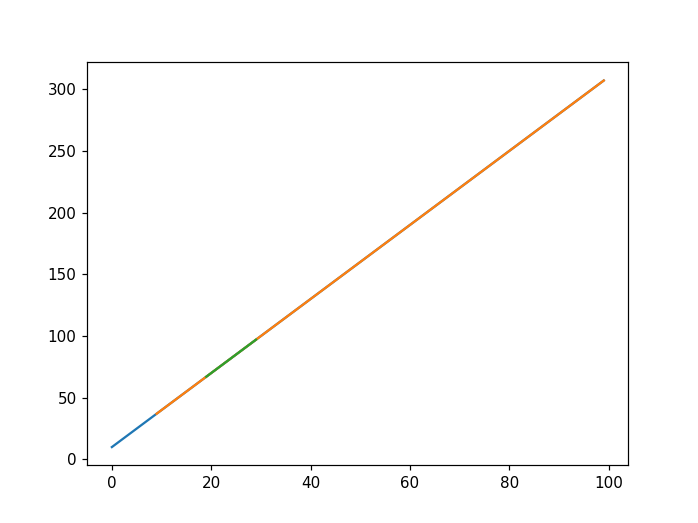

In [22]:
fig, ax = plt.subplots(1,1)
ax.plot(dataSet.get_data("x") , dataSet.get_data("y"))
ax.plot(dataSet.get_data("x", start=10) , dataSet.get_data("y", start=10))
ax.plot(dataSet.get_data("x", start=20, end=30) , dataSet.get_data("y", start=20, end=30))

## x-y (array) loop example

In [23]:
import numpy as np

In [24]:
dataSet = new_data_set("test", specs=[ParamSpec("x", "numeric"), ParamSpec("y", "array")])
dataSet.mark_started()

In [25]:
for x in range(100):
    dataSet.add_result({"x":x, "y":np.random.random_sample(10)})

<IPython.core.display.Javascript object>


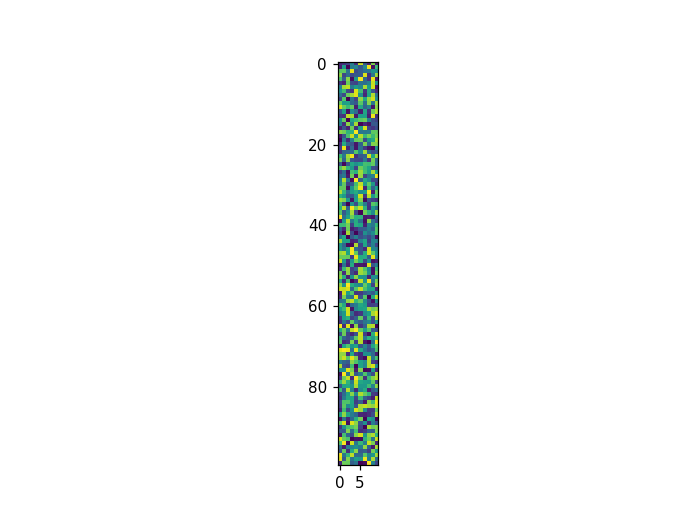

In [26]:
fig, ax = plt.subplots(1,1)
ax.imshow(np.concatenate(dataSet.get_data("y")))